
🌀 Running diagnostics for: Synthetic_Bhola (2035, NI)
🌍 Downloading LitPop for: India
✅ India exposure clipped to bounds: (86.0, 13.0, 93.5, 26.0)
🌍 Downloading LitPop for: Bangladesh
✅ Bangladesh exposure clipped to bounds: (86.0, 13.0, 93.5, 26.0)
✅ Exposure loaded with 18344 points.
🗺️ Track bounds with buffer: (86.0, 13.0, 93.5, 26.0)
📍 Generated 9956 centroids at 0.1° resolution.
✅ Hazard object created with shape: (1, 9956)
✅ Impact function assigned.
💰 Total direct impact (AAI): $20,196,096,741
💥 Total impact: $20,196,096,741
Plotted zones (> $1,000,000): 914
✅ Impact extracted with 914 zones above threshold.
📊 Total impact (from metadata): $20,196,096,741
✅ Boundary GDF loaded: <class 'geopandas.geodataframe.GeoDataFrame'>
✅ Exposure plotted via scatter.
✅ Impact plotted via points.
✅ Boundary overlay plotted.
✅ Storm track plotted.
✅ Figure saved to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_impact_map.png


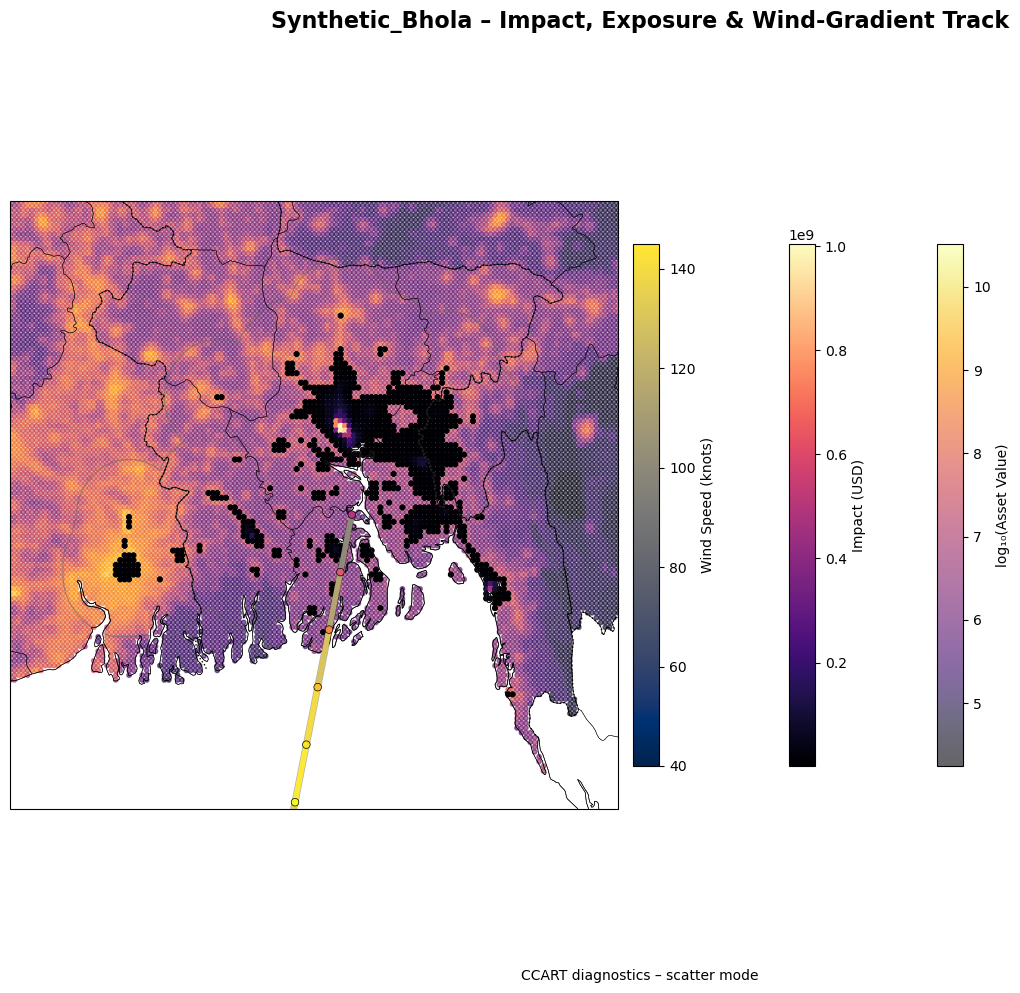


💥 Total impact: $19,535,145,320
Plotted zones (> $1M): 914
✅ Storm track exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_track.geojson
✅ Exposure exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_exposure.geojson
✅ Impact exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_impact.geojson
✅ Pipeline executed successfully.
🧮 Impact zones:


,impact_usd,latitude,longitude,geometry
265,2.751993e+06,24.062500,91.395833,POINT (91.39583 24.06250)
303,3.679739e+06,24.020833,91.395833,POINT (91.39583 24.02083)
304,1.252841e+06,24.020833,91.437500,POINT (91.43750 24.02083)
342,1.540920e+06,23.979167,91.270833,POINT (91.27083 23.97917)
343,3.872107e+06,23.979167,91.312500,POINT (91.31250 23.97917)


🏙️ Exposure points:


,value,region_id,impf_,impf_TC,geometry,centr_TC
0,9.015559e+04,356,1,1,POINT (88.85417 21.60417),3373
1,1.845753e+05,356,1,1,POINT (88.85417 21.56250),3373
2,1.336241e+05,356,1,1,POINT (88.89583 21.56250),3373
3,8.487188e+06,356,1,1,POINT (88.14583 21.85417),3137
4,5.139400e+06,356,1,1,POINT (88.10417 21.81250),3213


🌀 Storm track (GeoDataFrame):


,lon,lat,geometry
0,89.000000,16.0,POINT (89.00000 16.00000)
1,89.107143,16.5,POINT (89.10714 16.50000)
2,89.214286,17.0,POINT (89.21429 17.00000)
3,89.321429,17.5,POINT (89.32143 17.50000)
4,89.428571,18.0,POINT (89.42857 18.00000)


📊 Track metadata preview:


,time,max_sustained_wind,central_pressure,environmental_pressure,radius_max_wind,time_step,basin,lat,lon
0,1991-12-01 16:00:00,40,980.0,1010,60.0,3,NI,16.0,89.000000
1,1991-12-01 17:00:00,45,977.5,1010,55.0,3,NI,16.5,89.107143
2,1991-12-01 18:00:00,50,975.0,1010,50.0,3,NI,17.0,89.214286
3,1991-12-01 19:00:00,60,970.0,1010,45.0,3,NI,17.5,89.321429
4,1991-12-01 20:00:00,70,965.0,1010,40.0,3,NI,18.0,89.428571


✅ All outputs exported successfully.
⚠️ Missing wind data or impact points.


In [1]:
# 📌 1. Setup
import os
import sys
from datetime import datetime
import geopandas as gpd

# Add scripts folder to path
script_dir = "C:/CMIP data/GitHub Clean/ccart-cyclone-impact-modeling/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# Import pipeline runner
from function_load_synthetic_track import load_synthetic_bhola_track
from function_run_ccart_pipeline import run_ccart_pipeline

# 📌 2. Load synthetic Bhola track
track = load_synthetic_bhola_track()  # ✅ This defines 'track'

# 📌 3. Define Inputs
boundary_path = "C:/CMIP data/cmip6/Climada/Country Shape Files/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

def normalize_country_names(codes):
    mapping = {
        "IND": "India",
        "BGD": "Bangladesh",
        "USA": "United States of America",
        # Add more as needed
    }
    return [mapping.get(code, code) for code in codes]

countries = normalize_country_names(["IND", "BGD"])

# 📌 4. Run Pipeline
result = run_ccart_pipeline(
    name="Synthetic_Bhola",
    year=2035,
    basin="NI",
    countries=countries,
    boundary_path=boundary_path,
    save_fig=True,
    track_override=track
)

# 📌 5. Unpack and Inspect
if result:
    gdf_litpop, gdf_impact, gdf_track, track = result
    print("✅ Pipeline executed successfully.")
else:
    print("⚠️ Pipeline failed.")

# 📌 6. Preview Outputs
print("🧮 Impact zones:")
display(gdf_impact.head())

print("🏙️ Exposure points:")
display(gdf_litpop.head())

print("🌀 Storm track (GeoDataFrame):")
display(gdf_track.head())

# 📌 6b. Preview Track Metadata (xarray)
track_df = track.to_dataframe().reset_index()
print("📊 Track metadata preview:")
display(track_df.head())

# 📌 7. Export GeoJSONs
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
output_dir = f"../outputs/amphan_{timestamp}"
os.makedirs(output_dir, exist_ok=True)

gdf_litpop.to_file(f"{output_dir}/exposure.geojson", driver="GeoJSON")
gdf_impact.to_file(f"{output_dir}/impact.geojson", driver="GeoJSON")
gdf_track.to_file(f"{output_dir}/track.geojson", driver="GeoJSON")

print("✅ All outputs exported successfully.")

# 📌 8. Optional: Plot Diagnostics Inline
from function_plot_diagnostics import plot_tc_impact

plot_tc_impact(
    track=gdf_track,
    gdf_litpop=gdf_litpop,
    gdf_impact=gdf_impact,
    title="Synthetic Bhola 2035 – Impact, Exposure & Wind-Gradient Track",
    boundary_gdf=None,
    save_fig=False
)


